# Describing Distributions Core
<p> I will be analyzing and visualizing several features in the Medical Dataset provided by Coding Dojo </p>
<p> The features to analyze:</p>

- VitD_levels
- Doc_visits
- TotalCharge

Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('Data/data.csv')[['VitD_levels', 'Doc_visits', 'TotalCharge']]
df.head()

,VitD_levels,Doc_visits,TotalCharge
0,19.141466,6,3726.702860
1,18.940352,4,4193.190458
2,18.057507,4,2434.234222
3,16.576858,4,2127.830423
4,17.439069,5,2113.073274


In [3]:
df

,VitD_levels,Doc_visits,TotalCharge
0,19.141466,6,3726.702860
1,18.940352,4,4193.190458
2,18.057507,4,2434.234222
3,16.576858,4,2127.830423
4,17.439069,5,2113.073274
...,...,...,...
995,16.631573,7,2747.196682
996,17.810233,6,3661.760740
997,17.011913,5,5259.932456
998,16.526670,4,3083.731857


We will create a function to plot a histogram with the required information

In [4]:
def plot_histogram(df, col, cont):
    kurtosis = stats.kurtosis(df[col], fisher = False)
    feature = df[col]
    mean = feature.mean()
    median = feature.median()
    std = feature.std()
    plus_one_std = mean + std
    minus_one_std = mean - std
    fig,ax = plt.subplots(figsize=(10,6))
    if kurtosis == 3:
        print("It is mesokurtic")
    elif kurtosis > 3:
        print("It is leptokurtic")
    elif kurtosis < 3:
        print("It is platykurtic")
    if mean > median:
        print("It is positively skewed")
    elif median > mean:
        print("It is negatively skewed")
    elif median == mean:
        print("It is not skewed")
    if cont == True:
        print("It is continuous")
        sns.histplot(feature, ax = ax, discrete = False, stat = 'probability', kde = True)
    elif cont == False:
        print("It is discrete.")
        sns.histplot(feature, ax = ax, discrete = True, stat = 'density', kde = True)
    ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
    ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
    ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
    ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
    ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
    ax.set_title(f'{col}')
    ax.legend();
# Credit to Coding Dojo LP for advice on how to do these graphs and get these features

Create a function to tell us the kurtosis automatically

# VitD_levels

It is leptokurtic
It is negatively skewed
It is continuous


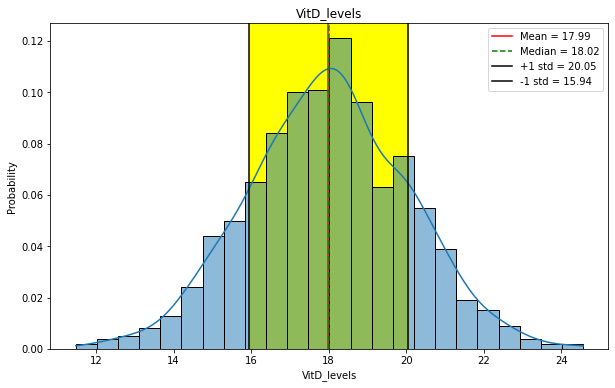

In [5]:
plot_histogram(df, 'VitD_levels', cont = True)

This graph is continuous. Though it is technically negatively skewed, the graph is rather normally distributed. 

# Doc_Visits

It is platykurtic
It is negatively skewed
It is discrete.


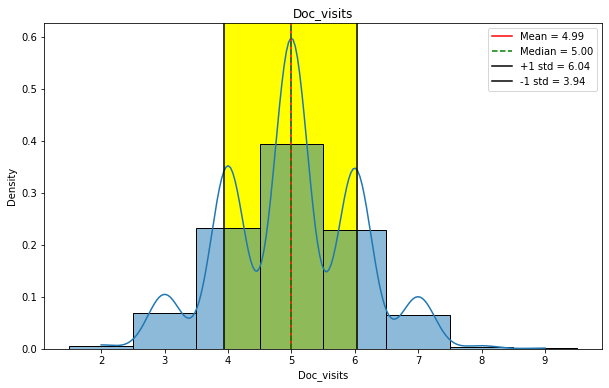

In [6]:
plot_histogram(df, 'Doc_visits', cont = False)

This graph is discrete. Though it is technically negatively skewed, the graph is rather normally distributed. 

# TotalCharge

It is leptokurtic
It is positively skewed
It is continuous


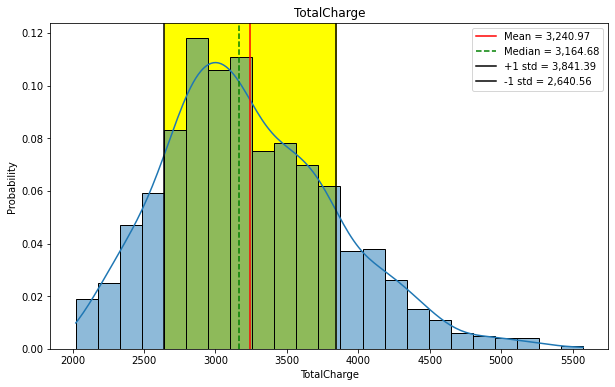

In [7]:
plot_histogram(df, 'TotalCharge', cont = True)

The graph is continous and visibly positively skewed. 